In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python


In [2]:
import math
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

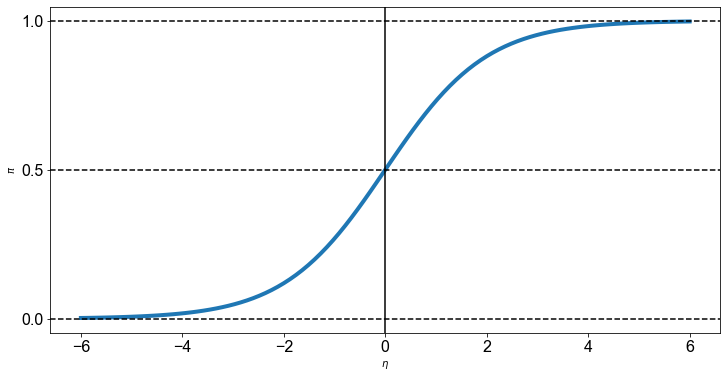

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-6, 6, 100)
z = 1 / (1 + np.exp(-x))
ax.plot(x, z, linewidth=4)

ax.set_yticks([0, 0.5, 1])
ax.set_xlabel("$\eta$")
ax.set_ylabel("$\pi$")
ax.axvline(0, color="k")
for _y in [0, 0.5, 1]:
    ax.axhline(_y, color="k", linestyle="--")

In [4]:
hurricanes = pd.read_excel("../../data/hurricanes.xlsx", index_col=0)
hurricanes.head(5)

,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
RowNames,,,,,,,,,,,
1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70


In [5]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 1 to 337
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    337 non-null    int64  
 1   Name      337 non-null    object 
 2   Year      337 non-null    int64  
 3   Type      337 non-null    int64  
 4   FirstLat  337 non-null    float64
 5   FirstLon  337 non-null    float64
 6   MaxLat    337 non-null    float64
 7   MaxLon    337 non-null    float64
 8   LastLat   337 non-null    float64
 9   LastLon   337 non-null    float64
 10  MaxInt    337 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 31.6+ KB


<Axes: >

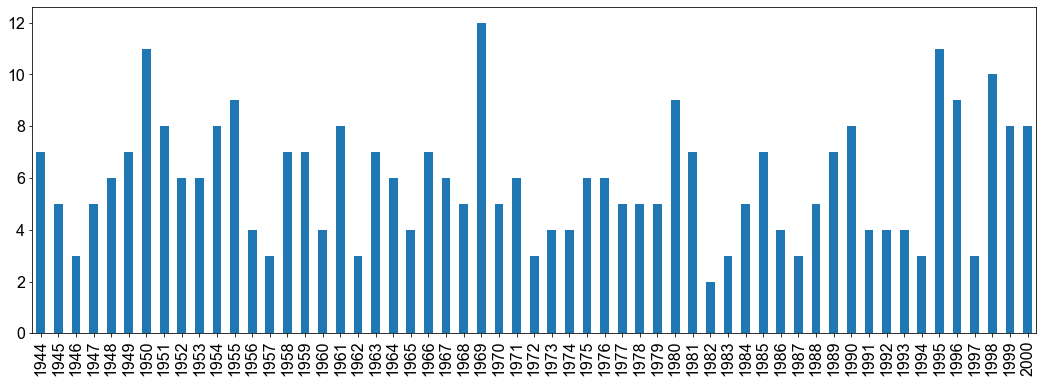

In [6]:
hurricanes["Year"].value_counts().sort_index().plot.bar(figsize=(18, 6))

In [7]:
hurricane_types = (
    hurricanes.groupby("Type")["Year"].value_counts().unstack().transpose()
)
hurricane_types = hurricane_types.rename(
    columns={0: "Tropisch", 1: "Baroklinisch beeinflusst", 3: "Barokline Entstehung"}
)

<Axes: xlabel='Year'>

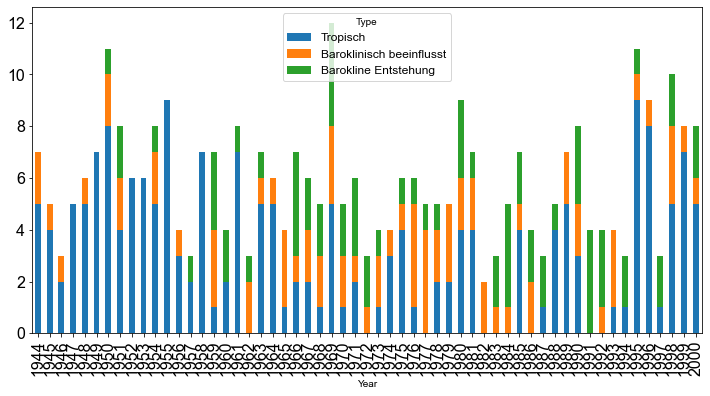

In [8]:
hurricane_types.plot.bar(stacked=True)

In [9]:
print(
    f"Klasse 0 (tropische Wirbelstürme) Hurrikans: {hurricane_types['Tropisch'].sum()}"
)
print(
    f"Klasse 1 (barokline Einflüsse) Hurrikans: {hurricane_types['Baroklinisch beeinflusst'].sum()}"
)
print(
    f"Klasse 3 (barokline Auslösung) Hurrikans: {hurricane_types['Barokline Entstehung'].sum()}"
)

Klasse 0 (tropische Wirbelstürme) Hurrikans: 187.0
Klasse 1 (barokline Einflüsse) Hurrikans: 77.0
Klasse 3 (barokline Auslösung) Hurrikans: 73.0


In [10]:
hurricanes["Origins"] = hurricanes["Type"].replace(
    {0: "tropisch", 1: "aussertropisch", 3: "aussertropisch"}
)

In [11]:
hurricanes["Origins"].value_counts()

tropisch          187
aussertropisch    150
Name: Origins, dtype: int64

In [12]:
hurricanes.head()

,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt,Origins
RowNames,,,,,,,,,,,,
1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80,aussertropisch
2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80,tropisch
3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105,tropisch
4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120,tropisch
5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70,tropisch


In [13]:
# Create the map
hurricane_map = folium.Map(location=[25, -50], zoom_start=4)
# add marker one by one on the map
colors = {"aussertropisch": "green", "tropisch": "red"}
for row in hurricanes.itertuples():
    m = folium.Marker(
        location=[row.FirstLat, row.FirstLon], icon=folium.Icon(colors[row.Origins])
    )
    m.add_to(hurricane_map)
# Show the map
hurricane_map

In [14]:
X = hurricanes["FirstLat"].values
X = sm.add_constant(X)
y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values
log_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

In [15]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:                            GLM   Df Residuals:                      335
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.02
Date:                Sat, 10 Jun 2023   Deviance:                       232.03
Time:                        12:54:44   Pearson chi2:                     430.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4963
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0826      0.961     -9.446      0.000     -10.967      -7.198
x1             0.3728      0.039      9.447      0.000       0.295       0.450
==============================================================================
"""

In [16]:
log_model.params

array([-9.08263355,  0.37282953])

In [17]:
math.exp(log_model.params[1])

1.451836826600862

In [18]:
log_model.params[1]

0.3728295317136198

In [19]:
lci = log_model.conf_int()[1][0]
uci = log_model.conf_int()[1][1]

In [20]:
print(f"2,5%:  {round(lci,4)}")
print(f"97,5%: {round(uci,4)}")

2,5%:  0.2955
97,5%: 0.4502


In [21]:
print(f"2,5%:  {round(math.exp(lci),4)}")
print(f"97,5%: {round(math.exp(uci),4)}")

2,5%:  1.3438
97,5%: 1.5686


In [22]:
pred = [10.0, 23.5, 30.0]  #
pred = sm.add_constant(pred)
predictions = log_model.get_prediction(exog=pred).summary_frame()
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.004705,0.002701,0.001524,0.01443
1,0.420398,0.040645,0.343423,0.50145
2,0.891122,0.028045,0.822841,0.93516


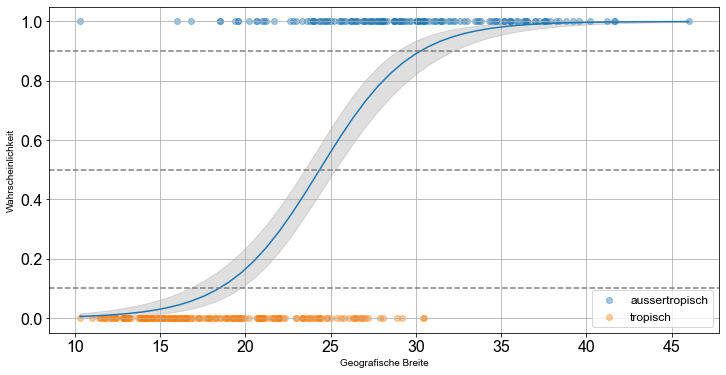

In [23]:
# Berechne Vorhersagen für lats
X = hurricanes["FirstLat"].values
X = sm.add_constant(X)
y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values

lats_grid = np.linspace(min(hurricanes["FirstLat"]), max(hurricanes["FirstLat"]))


log_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predictions = log_model.get_prediction(exog=sm.add_constant(lats_grid)).summary_frame()

# Ploting
fig, ax = plt.subplots()
ax.plot(lats_grid, predictions["mean"])
ax.fill_between(
    lats_grid,
    predictions["mean_ci_lower"],
    predictions["mean_ci_upper"],
    color="grey",
    alpha=0.25,
)
outer = hurricanes.loc[hurricanes.Origins == "aussertropisch", "FirstLat"].values
ax.scatter(outer, np.repeat(1, repeats=len(outer)), label="aussertropisch", alpha=0.4)
tropical = hurricanes.loc[hurricanes.Origins == "tropisch", "FirstLat"].values
ax.scatter(tropical, np.repeat(0, repeats=len(tropical)), label="tropisch", alpha=0.4)

ax.grid()
for _y in [0.1, 0.5, 0.9]:
    ax.axhline(y=_y, color="gray", linestyle="dashed")
ax.set_xlabel("Geografische Breite")
ax.set_ylabel("Wahrscheinlichkeit")
ax.legend()